In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
a = -1
b = 2
array1_shuffled = np.array([*range(20)])
array1_shuffled

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [3]:
array2_shuffled = a * array1_shuffled + b
array2_shuffled

array([  2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10,
       -11, -12, -13, -14, -15, -16, -17])

In [4]:
shuffler = np.random.permutation(len(array1_shuffled))
X = array1_shuffled[shuffler]
Y = array2_shuffled[shuffler]
print("X= ",X, "\nY= ",Y)

X=  [15 11 19  4  1 12 18  0  3 14 17  7  8 16  9  2 13  6 10  5] 
Y=  [-13  -9 -17  -2   1 -10 -16   2  -1 -12 -15  -5  -6 -14  -7   0 -11  -4
  -8  -3]


## Adagrad

In [5]:
def adagrad(x, y, itera, b, alpha, epslon):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while ((j < itera) and (abs(cost_new)> 0.01 or j == 0)):
        cost_func = cost_new
        for i in range(0,int(n/b)):

            Wt_0 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0])

            Vt[0] = Vt[0] + (Wt_0)**2
            theta[0] = theta[0] - (alpha / (np.sqrt(Vt[0]) + epslon)) * Wt_0
            #====================================================#

            Wt_1 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1])

            Vt[1] = Vt[1] + (Wt_1)**2
            theta[1] = theta[1] - (alpha / (np.sqrt(Vt[1]) + epslon)) * Wt_1

            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j = j+1
    print(j)
    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]

In [6]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = adagrad(X,Y,10000,len(X), 0.05, 10e-8)

6988


In [7]:
print(theta_0,"\t",theta_1)

1.7277074690180032 	 -0.9785136145371547


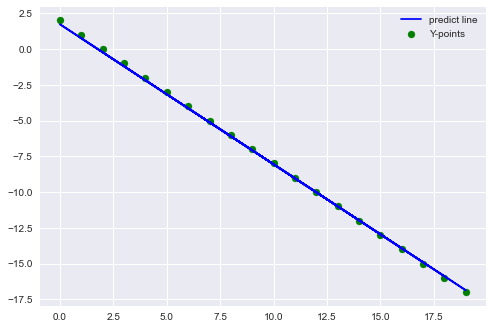

In [8]:
plt.style.use('seaborn')
plt.plot(X,h_theta,label="predict line",color="blue")
plt.scatter(X,Y,label="Y-points",color="green")
plt.legend()
plt.show()

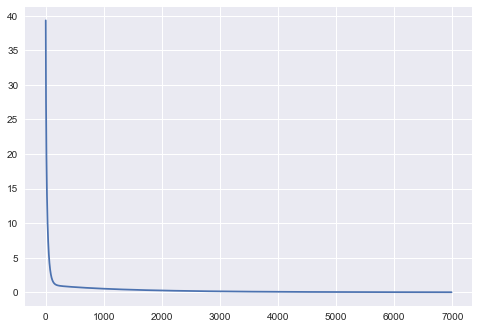

In [9]:
plt.plot([*range(len(cost))],cost)
plt.show()

In [10]:
print(cost[-1])

0.009998878506557661


## RMS_Prop

In [11]:
def rms_prop(x, y, itera, b, alpha, epslon, beta):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while ((j < itera) and (abs(cost_new)> 0.01 or j == 0)):
        cost_func = cost_new
        for i in range(0,int(n/b)):

            Wt_0 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0])

            Vt[0] = beta * Vt[0] + (1 - beta) * (Wt_0)**2
            theta[0] = theta[0] - (alpha / (np.sqrt(Vt[0]) + epslon)) * Wt_0
            #====================================================#

            Wt_1 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1])

            Vt[1] = beta * Vt[1] + (1 - beta) * (Wt_1)**2
            theta[1] = theta[1] - (alpha / (np.sqrt(Vt[1]) + epslon)) * Wt_1

            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j = j+1
    print(j)
    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]
    

In [12]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = rms_prop(X,Y,10000,len(X), 0.01, 10e-8, 0.9)

351


In [13]:
print(theta_0,"\t",theta_1)

1.757640364784583 	 -0.9758659119813452


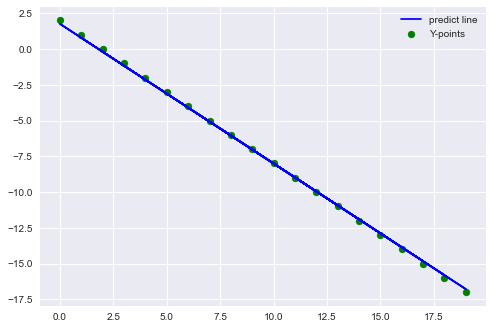

In [14]:
plt.style.use('seaborn')
plt.plot(X,h_theta,label="predict line",color="blue")
plt.scatter(X,Y,label="Y-points",color="green")
plt.legend()
plt.show()

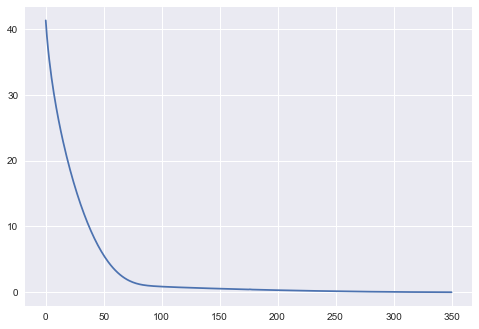

In [15]:
plt.plot([*range(len(cost))],cost)
plt.show()

In [16]:
r2_score(Y, h_theta)

0.999412395776366

In [17]:
print(cost[-1])

0.009768920217916451


## Adam

In [72]:
def adam(x, y, itera, b, alpha, epslon, beta_1, beta_2):
    theta_all = []
    cost = []
    
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    mt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while  (j < itera) and (abs(cost_new)> 0.01 or j == 0):
        cost_func = cost_new
        for i in range(0,int(n/b)):

            Wt_0 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0])
            mt[0] =beta_1 * mt[0] + (1-beta_1) * Wt_0

            Vt[0] = beta_2 * Vt[0] + (1-beta_2) * ((Wt_0)**2)
#             mt[0] = mt[0] / (1-beta_1**(j+1))
#             Vt[0] = Vt[0] / (1-beta_2**(j+1))
            theta[0] = theta[0] - (alpha / (np.sqrt(Vt[0]) + epslon)) * mt[0]
            #====================================================#

            Wt_1 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1])
            mt[1] =beta_1 * mt[1] + (1-beta_1) * Wt_1

            Vt[1] = beta_2 * Vt[1] + (1-beta_2) * ((Wt_1)**2)
#             mt[1] = mt[1] /(1-beta_1**(j+1))
#             Vt[1] = Vt[1] / (1-beta_2**(j+1))
            theta[1] = theta[1] - (alpha / (np.sqrt(Vt[1]) + epslon)) * mt[1]

            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        j +=1
    print(j)
    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta, theta[0], theta[1]

In [80]:
thetall_0, thetall_1, cost, h_theta, theta_0 , theta_1 = adam(X,Y, 10000,len(X), 0.01, 10e-8, 0.9, 0.95)

381


In [81]:
print(theta_0,"\t",theta_1)

1.7331788689220509 	 -0.9797526894495739


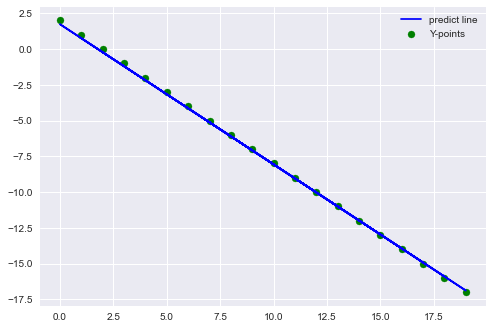

In [82]:
plt.style.use('seaborn')
plt.plot(X,h_theta,label="predict line",color="blue")
plt.scatter(X,Y,label="Y-points",color="green")
plt.legend()
plt.show()

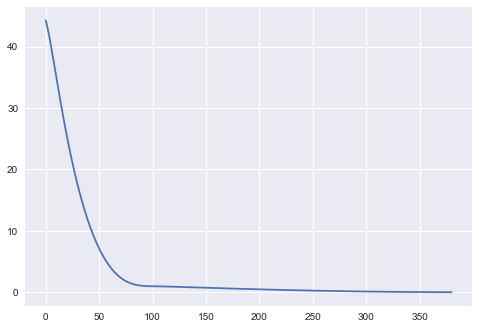

In [83]:
plt.plot([*range(len(cost))],cost)
plt.show()

In [84]:
print(cost[-1])

0.009588493966965005


In [85]:
r2_score(Y, h_theta)

0.9994232484831901

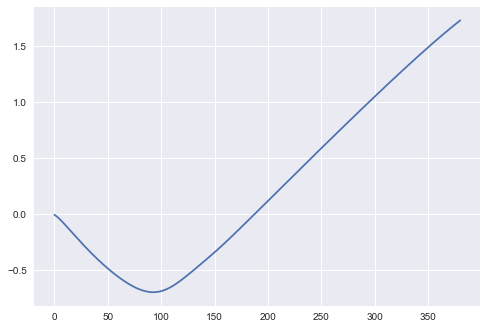

In [86]:
plt.plot([*range(len(thetall_0))],thetall_0)